https://colab.research.google.com/github/ga642381/ML2021-Spring/blob/main/HW01/HW01.ipynb

In [7]:
import json
import math
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torch import nn

def save_result(preds):
    with open('submission.csv', 'w', encoding='utf-8') as f:
        f.write('id,tested_positive\n')
        for i, pred in enumerate(preds):
            f.write('%d,%f\n' % (i, pred))
    
    return

# loss_record = {"train": [338.8324902564143, 300.1206629882458, 309.41258023480356, 145.69407738887747, 289.8134118404678, 291.6760574651674, 334.3836256452923, 315.8737479800885, 209.23943781182967, 236.81603356977706, 189.86549218773973, 160.52760421077537, 280.0016513158014, 267.7548507515039, 278.15674118761734, 166.38160025578884, 319.30744387980326, 204.28195872446082, 181.99305093328454, 218.22128231221092, 162.26057086959662, 64.73518166531008, 110.40258774163587, 208.9251678678948, 182.64052071440454, 138.2169423235864, 48.413575080988345, 37.013469786220625, 62.99520617263815, 69.15946845151676, 110.16284090167868, 41.1942962857465, 46.32759518000252, 142.99812931242602, 58.73162433100042, 55.741664041161016, 49.190149569387515, 26.404623853955812, 18.912452561765697, 17.669911249111045, 20.72781174209063, 19.919526969337554, 39.410228585289396, 22.26082406120151, 40.471893575253404, 17.94784264800843, 30.74124783206616, 25.516015454757937, 84.51766995716228, 12.456371135225762, 14.916355149908838, 39.8936788554534, 32.389191253323276, 90.53185351897793, 46.0995767945348, 18.168463603125815, 10.794420508844489, 10.18186166360786, 10.259098709170187, 17.319344481075102, 37.41348503515055, 15.208015544289328, 24.550035608751806, 6.0516923346327705, 13.597652870867075, 8.548588873450464, 20.203206332631538, 34.185418266576434, 101.15420361278828, 43.30534397889758, 12.104288293881314, 6.9079855555659435, 11.631063355645985, 34.59621762418044, 17.665342942023553, 46.71013883192069, 17.886925583594394, 32.29982244201045, 9.346324818388478, 5.033926815280658, 7.9935383060262915, 5.315085720233034, 12.088883773529194, 33.44042677147008, 101.23013100210238, 33.60359628756596, 17.060327134306736, 5.070760844804232, 4.829672690335647, 6.5203425038814755, 7.679362754432013, 12.12700061009711, 9.146226402790425, 13.214848511170244, 22.076412487453517, 28.800103605506905, 4.8163071459594065, 4.4151502815184624, 4.593426453944634, 3.3734777140873513, 5.836599846037702, 6.078169516505016, 6.185683332588629, 12.68662644699382, 14.412390848977656, 37.649593458904825, 4.953026723853803, 3.78695703619407, 4.778810923145538, 3.2315823358099633, 5.48613161230946, 5.647293319228187, 4.706884808532317, 7.868641051882097, 10.299799199530614, 22.948683678946725, 3.149560684151326, 2.556178629706999, 2.553797902547779, 2.6397642984473277, 2.338417790399397, 3.032053577197205, 3.298178388926864, 3.6566909491310375, 2.7725958726210846, 2.19557134095202, 2.9903543561589805, 2.2274606042966716, 2.523463354915582, 2.9741672586312546, 3.3500289798218064, 4.018673068248991, 6.862403806092638, 14.691688853633618, 10.797449834068814, 22.54570148673751, 12.63021488214626, 31.280814934741993, 4.855538566256259, 6.19676942019173, 4.947974120020652, 7.144830023742216, 7.020977280273048, 16.829164625733963, 9.20165889591547, 18.767181840816615, 5.231822188083326, 4.312841907055251, 2.756975032879118, 3.00673263163634, 3.0690577547640467, 3.389446699092436, 2.8037595907918895, 2.4709425238820595, 1.6854016864923587, 2.2027052441748824, 2.338260172502632, 3.2526473142446197, 2.824131940401834, 2.3709247179451243, 1.8106800730126524, 2.4727933867050207, 2.280975189310591, 2.2806716723283316, 3.1487829412189736, 3.6615328175418593, 4.412943561715539, 5.814765116371505, 14.395957618379036, 12.411907185991561, 12.067936234966893, 4.4370873856858815, 2.981066989823312, 6.575822140698181, 4.992138071069727, 16.62753141240558, 19.67860888432716, 40.24788501500451, 6.820352192342027, 2.762915425671733, 4.870327421324715, 11.766566599650009, 16.64568249378288, 7.5187213829234025, 13.996754709195127, 36.9150145415871, 3.583460992957627, 2.2308804695987106, 2.5937633560009927, 3.402988703972714, 3.009843919162161, 3.554928753101159, 2.902871415878872, 1.6784578599706417, 1.9035268578268174, 1.4994215683164525, 2.212154976063716, 2.913067086973258, 2.89644793815801, 2.805163547413807, 3.1978842774976277, 3.3998559990996244, 2.408560725122295, 3.610500604296875, 5.76626710270368, 8.828009039672782, 5.903157650896437, 8.808886389821609, 7.4998162288074255, 32.316752056491474, 15.56654417585118, 31.55867070324998, 7.509705103686097, 9.680599796916788, 8.35078297009555, 15.966606762975719, 5.950185767705416, 12.608185701285569, 3.7232026981107817, 3.53089177187456, 3.5547475499944596, 3.663786270000208, 4.126064182256027, 5.174231558656941, 4.4237306418925355, 5.433056584131636, 3.470354543924751, 5.164539924347686, 4.233809537323239, 8.391455056756438, 6.690663208880638, 10.474103741852897, 1.613650192436233, 3.0146048313622824, 4.024272786458019, 2.7060164577500605, 1.8123976088056506, 1.5907337861321715, 2.203556214319332, 1.654234966566828, 1.766649085333844, 1.9679593495350594, 1.665219140202436, 1.9885870851142515, 2.3917139556634197, 1.999903891801406, 2.671947996203217, 3.0502915927220915, 3.942301594004851, 4.011532869583377, 3.162243843949412, 1.3468152595462952, 2.1681200419674074, 3.3878347956910284, 5.527790374441944, 10.936712649144898, 28.811973092317295, 4.538650928494108, 8.363785948562608, 2.9295432599225384, 2.646880741454667, 2.1735672111357935, 2.766817348539472, 2.8717450965745255, 2.9330304933989435, 3.318409123189922, 4.806196543367503, 1.9522280632833469, 1.3708521585762732, 1.829975849410967, 1.407096709547014, 2.196378200939091, 1.3288149330576953, 1.2743600183728472, 2.0869588737518, 1.7367286024683808, 1.6018070067959131, 1.5512993700688655, 1.2273916584228708, 2.2499543484082722, 3.83738183170415, 6.1099766986455135, 10.679657185821613, 7.76944763274611, 21.304239699275023, 4.702645436044126, 5.166137393291516, 2.047993197875022, 3.1065958919357257, 3.0948922024296968, 7.3516691827346765, 7.901220507002014, 15.485394785284958, 3.8154232363213074, 4.713157686134897, 2.9158238912346093, 5.034881269291264, 7.969565151028514, 8.327658490486161, 3.6833281374533264, 1.7485732878929219, 1.386503247681834, 1.970354567232902, 1.67495071784802, 1.6027755197200704, 1.4352633778698844, 2.224163215032316, 1.8930573623995617, 1.8000540953353896, 1.3286156779367588, 0.9708548527232406, 1.1894302280821867, 1.5281317953227482, 1.4750071739658654, 1.480193687000633, 1.0526797404784565, 1.3545740739972507, 1.4447871204908531, 1.748989458831172, 1.1069160901004726, 1.4055766222573134, 1.6134106989576296, 1.3619627389795599, 1.3153847626723734, 1.2055676990533408, 1.8147765658656039, 4.135409726108141, 6.146914944847218, 10.501950430049865, 11.905179437084705, 32.482997056250134, 2.20383688886092, 4.160669150814636, 6.4559550598550235, 8.982688130156323, 10.732979003098878, 14.409562197781927, 3.0282393007026416, 2.339565614372817, 1.8200000595431343, 2.3535825717999943, 3.1698306906827813, 2.2777988034058367, 1.2889046704602247, 1.340621090269041, 1.8303797086189368, 1.1979113734175837, 1.1141500436109422, 1.2903472328565377, 1.2228389874519257, 1.1774012241628653, 1.3172786928873408, 2.245039405233087, 3.085560771985923, 5.807804927047279, 8.889862198562625, 2.5514752007712493, 3.6178941722861717, 4.388028624884762, 5.211645885059664, 3.468907245211062, 4.0690766394448215, 2.349025837760106, 1.5287088622455483, 1.7085556127168755, 1.5504187125323758, 1.4397823574135038, 1.3027397419379494, 1.5559180216412596, 1.1435223091881748, 1.481474904665061, 1.212523817983449, 1.0058059205013534, 1.1750261830512176, 1.2946482648345339, 1.5499493839784517, 1.4137841826842537, 0.9464607912169936, 1.3365920344038935, 1.1020059166000453], "dev": [1.4857651925851194, 1.224646761269773, 1.841398691583461, 1.8329253902329778, 1.2566564951547168, 1.6972442943938906, 1.734018899823199, 1.7836332131760515, 0.985714850741864, 2.098369763892207, 1.9320754018422004, 1.8782117995315595, 1.307407662313678, 1.2786151500071823, 1.2037468813339653, 1.7649545465549212, 1.3718124899733175, 1.902692921338833, 1.498282390749725, 0.5571990645468765, 1.7232709331942684, 1.68511789762043, 1.3079610898902536, 1.432101530335346, 2.336814596325156, 1.65491977133395, 1.6745350326582158, 1.451490687212408, 1.405749553087569, 2.161986741459578, 1.9664424279208172, 1.2252144251511234, 1.1152825729641274, 2.0366173757151995, 1.4449044216464364, 1.9027467789148818, 1.1693799332674626, 1.2422343580263475, 2.106106553520988, 1.0933120926022648, 1.3781996727197097, 1.440145342467146, 1.7738356584882613, 1.4198945432363297, 2.9602488094856167, 1.6132376082999296, 1.602102654261877, 1.6159830834251352, 1.520130011123483, 1.40880588286172]}
def plot_learning_curve(loss_record, title=''):
    # 打开文件进行写入（'wb' 表示写入二进制模式）
    # with open('new_data.json', 'w', encoding='utf-8') as file:
    #     file.write(json.dumps(loss_record))

    # return

    ''' Plot learning curve of your DNN (train & dev loss) '''
    total_steps = len(loss_record['train'])
    x_1 = range(total_steps)
    x_2 = x_1[::math.ceil(len(loss_record['train']) / len(loss_record['dev']))]
    # plt.figure(figsize=(6, 4))
    plt.plot(x_1, loss_record['train'], c='tab:red', label='train')
    plt.plot(x_2, loss_record['dev'][:len(x_2)], c='tab:cyan', label='dev')
    plt.ylim(0.0, 5.)
    plt.xlabel('Training steps')
    plt.ylabel('MSE loss')
    plt.title('Learning curve of {}'.format(title))
    plt.legend()
    plt.show()

def plot_pred(preds=None, targets=None, lim=35.):
    ''' Plot prediction of your DNN '''
    if preds is None or targets is None:
        return 
    
    plt.figure(figsize=(5, 5))
    plt.scatter(targets, preds, c='r', alpha=0.5)
    plt.plot([-0.2, lim], [-0.2, lim], c='b')
    plt.xlim(-0.2, lim)
    plt.ylim(-0.2, lim)
    plt.xlabel('ground truth value')
    plt.ylabel('predicted value')
    plt.title('Ground Truth v.s. Prediction')
    plt.show()

class CovidDataset(Dataset):
    def __init__(self, data_path, mode="train", transform=None):
        self.data = pd.read_csv(data_path)
        self.mode = mode
        self.transform = transform
        self.data.drop("id", axis=1, inplace=True)
        self.data.iloc[:,40:93] = (self.data.iloc[:,40:93] - self.data.iloc[:, 40:93].mean())/self.data.iloc[:,40:93].std()
        
        # 需要区分 train data 和 test data
        if self.mode == "train":
            indices = [i for i in range(len(self.data)) if i % 10 != 0]
            self.data = self.data.iloc[indices, :]
        elif self.mode == "dev":
            indices = [i for i in range(len(self.data)) if i % 10 == 0]
            self.data = self.data.iloc[indices, :]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = self.data.iloc[idx, :93].values
        y = self.data.iloc[idx, -1]

        if self.transform:
            x = self.transform(x)
        
        if self.mode != "test":
            return x, y
        else:
            return x


train_data = CovidDataset("./data/covid.train.csv", "train")
dev_data = CovidDataset("./data/covid.train.csv", "dev")
test_data = CovidDataset("./data/covid.test.csv", "test")

train_dataloader = DataLoader(train_data, batch_size=256, shuffle=True)
dev_dataloader = DataLoader(dev_data, batch_size=256, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=True)

# train_features, train_labels = next(iter(train_dataloader))
# print(f"Feature batch shape: {train_features.size()}")
# print(f"Labels batch shape: {train_labels.size()}")
# print(train_features[0], train_labels[0])

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=93, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=1, bias=True)
  )
)
Train Epoch 1
-------------------------------
loss: 351.716932  [  256/ 2430]
Train Epoch 2
-------------------------------
loss: 294.642951  [  256/ 2430]
Train Epoch 3
-------------------------------
loss: 213.256365  [  256/ 2430]
Train Epoch 4
-------------------------------
loss: 67.674719  [  256/ 2430]
Train Epoch 5
-------------------------------
loss: 30.285726  [  256/ 2430]
Train Epoch 6
-------------------------------
loss: 20.899991  [  256/ 2430]
Train Epoch 7
-------------------------------
loss: 16.778284  [  256/ 2430]
Train Epoch 8
-------------------------------
loss: 15.857456  [  256/ 2430]
Train Epoch 9
-------------------------------
loss: 12.357441  [  25

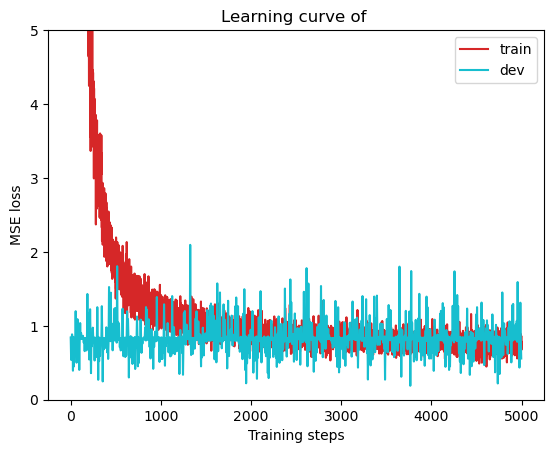

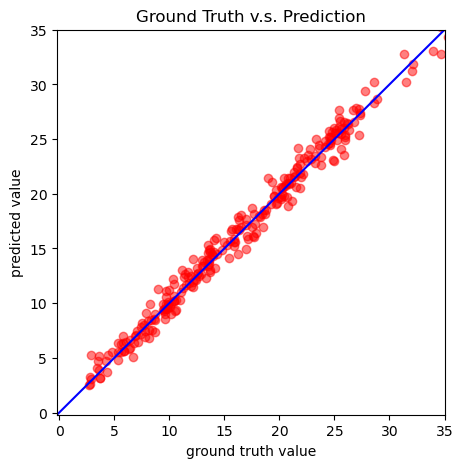

tensor([21.6241,  5.4992,  5.1716,  9.0455,  6.1223, 14.1525, 11.1765, 19.9406,
        14.2532, 23.2185, 12.0091,  8.2282, 11.9203,  9.8403,  8.4819, 32.3853,
         9.8434, 10.0121,  7.1698, 21.5558, 14.4343, 10.6274, 15.8374, 10.0883,
         5.1710,  5.5057,  5.2430, 11.7026, 15.9849, 20.4117, 20.6635, 25.0786,
        18.2389,  5.1927, 25.5605, 16.8504, 12.6247, 27.0761, 17.2417, 29.1689,
        28.5905,  5.9181,  7.2612, 13.4703, 19.4180,  4.4462, 11.4567, 17.5444,
        17.2375, 24.6239, 15.9335, 16.5359, 15.4003, 22.9462,  6.0665, 15.3060,
         9.7478, 30.0991,  6.1660, 20.6558,  9.0192, 12.1949, 11.0541, 27.0637,
        12.6083, 24.1749, 23.2261, 16.6537, 22.9210, 25.7584,  4.9633, 24.4983,
         9.0542,  8.8163, 10.4062, 17.3141, 16.1372, 27.4023, 18.1536, 14.0779,
        10.4461, 39.4479, 24.1744, 16.8716, 21.0880, 22.2827, 11.4164, 14.2925,
        21.3908, 20.7505,  9.6003, 14.5731,  6.4404, 13.3543, 29.9350, 24.6255,
        19.5839, 24.3827,  5.2642,  4.96

In [8]:

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(93, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
        )
        # self.linear = nn.Linear(94, 1)
        self.double()

    def forward(self, x):
        # x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        # logits = self.linear(x)
        return logits

model = NeuralNetwork()
print(model)

loss_fn = nn.MSELoss()
loss_record = {"train": [], "dev": []}
pred_record = []
target_record = []

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X, y

        # Compute prediction error
        pred = model(X)
        pred = pred.squeeze()
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        loss_record["train"].append(loss.item())

        if batch % 10 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    
def dev(dataloader, model, loss_fn):
    global pred_record, target_record

    pred_record = []
    target_record = []

    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            pred = pred.squeeze()
            loss = loss_fn(pred, y)

            loss_record["dev"].append(loss.item())
            
            pred_record.append(pred)
            target_record.append(y)
            print("loss", loss)

    pred_record = torch.cat(pred_record, dim=0).numpy()
    target_record = torch.cat(target_record, dim=0).numpy()
    
            # test_loss += loss_fn(pred, y).item()
            # correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    # test_loss /= num_batches
    # correct /= size
    # print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

def test(dataloader, model):
    model.eval()
    preds = []
    with torch.no_grad():
        for X in dataloader:
            pred = model(X)
            pred = pred.squeeze()

            preds.append(pred)
    
    preds = torch.cat(preds, dim=0)
    print(preds)
    save_result(preds)


epochs = 500
for t in range(epochs):
    print(f"Train Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)

for t in range(epochs):
    print(f"Test Epoch {t+1}\n-------------------------------")
    dev(dev_dataloader, model, loss_fn)

plot_learning_curve(loss_record, "")
plot_pred(pred_record, target_record)

test(test_dataloader, model)
    
print("Done!")

In [9]:
m = np.array([[3,4],[5,6]])
n = np.array([1,1])
o = np.array([[1],[1]])

print(m - n)
print(m - o)


[[2 3]
 [4 5]]
[[2 3]
 [4 5]]
